In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def cost_function(x,y,w,b):
    m=x.shape[1]
    z=np.dot(w.T,x)+b
    A=1.0/(1.0+np.exp(-z))
    j=np.dot(np.log(A),-y.T)+np.dot(np.log(1.0-A),-(1.0-y).T)
    return j[0]

In [3]:
def logistic_regression(x,y,alpha):
    cost_values=[]
    w=np.random.rand(x.shape[0],1)
    b=1
    m=x.shape[1]
    temp_cost=cost_function(x,y,w,b)
    cost_values.append(temp_cost)
    cost_change=1
    while(cost_change>0.0001):
        z=np.dot(w.T,x)+b
        dz=z-y
        dw=1.0/m*np.dot(x,dz.T)
        db=1.0/m*np.sum(dz)
        w=w-alpha*dw
        b=b-alpha*db
        cost=cost_function(x,y,w,b)
        cost_values.append(cost)
        cost_change=np.absolute(temp_cost-cost)
        temp_cost=cost
   
    plt.plot(cost_values)
    plt.ylabel('cost function')
    plt.xlabel('no. of iterations')
    plt.show()
    print("weights:",w)
    print("bias:", b)
    return w,b

In [4]:
def prediction(x,w,b):
    m=x.shape[1]
    z=np.dot(w.T,x)+b
    A=1.0/(1.0+np.exp(-z))
    A[A<0.53]=0
    A[A>=0.53]=1
    return A

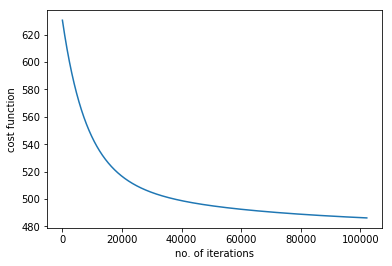

('weights:', array([[-0.03199264],
       [ 0.42202915],
       [ 0.37636096],
       [ 0.4077058 ],
       [ 0.409798  ],
       [ 0.82403079],
       [ 0.29812424]]))
('bias:', 0.38163916475927473)
('train classification error:', 55.714285714285715)
('test classification error:', 56.02094240837696)


In [5]:
def classification_error(x,y,w,b):
    a=(prediction(x,w,b)==y)
    b=float(np.count_nonzero(a == True)) 
    accuracy=(b/a.shape[1])*100  
    return accuracy

titanic=pd.read_csv("train.csv")
y=titanic.Survived.values.reshape(891,1)
y_train=y[0:700]
y_test=y[700:]
y_train=y_train.T
y_test=y_test.T

x=titanic.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
x["Age"].fillna(x["Age"].mean(),inplace=True)
x=(pd.concat([x,pd.get_dummies(x["Sex"])],axis=1)).drop(["Survived","Sex"],axis=1)
x_range=x.max()-x.min()
x=(x-x.mean())/x_range

x_train=x[0:700]
x_test=x[700:]
x_train=(x_train.T).values
x_test=(x_test.T).values

predicted_w,predicted_b=logistic_regression(x_train,y_train,alpha=0.0001)


print("train classification error:",classification_error(x_train,y_train,predicted_w,predicted_b))
print("test classification error:",classification_error(x_test,y_test,predicted_w,predicted_b))